In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

In [2]:
smiles_list = ['C(C(=O)O)N', 'C1=CC=C(C=C1)C[C@@H](C(=O)O)N', 'C1=C(NC=N1)C[C@@H](C(=O)O)N', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

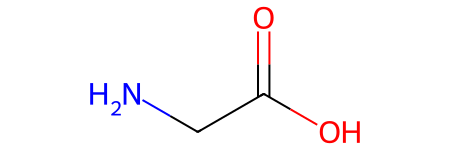

In [3]:
glycine = mol_list[0]
glycine

In [4]:
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2,nBits=1024)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
print(fp_arr)
np.nonzero(fp_arr)

[0. 0. 0. ... 0. 0. 0.]


(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)

In [5]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2,nBits=1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

Let's draw the fingerprints:

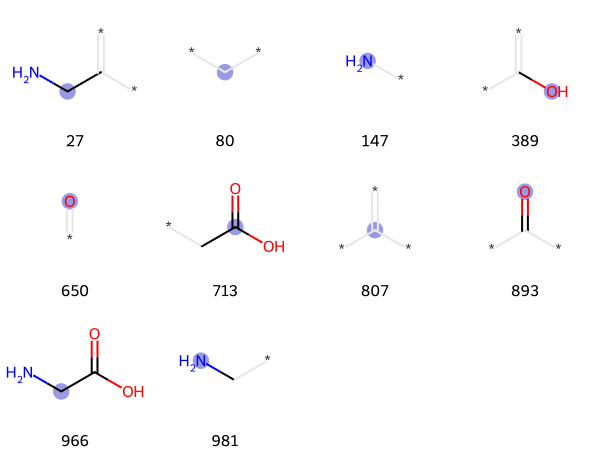

In [6]:
prints = [(glycine,x,bi) for x in fp.GetOnBits()]
#print(prints)
Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

Let's compare Cys and Gly:

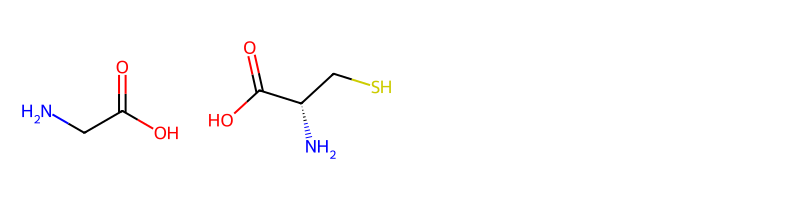

In [7]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img

Let's get fingerprints for Cysteine:

In [8]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine,2,nBits=1024, bitInfo=bi)
print('Cys',list(fp2.GetOnBits()))
print('Gly',list(fp.GetOnBits()))

Cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
Gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [9]:
common = set(fp.GetOnBits()) & set(fp2.GetOnBits())
print(common)

{389, 807, 650, 80, 147, 893}


In [10]:
combined = set(fp.GetOnBits()) | set(fp2.GetOnBits())
print(combined)

{1, 321, 389, 966, 902, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}


In [11]:
print('Similarity:', len(common)/len(combined))
print('Similarity:', DataStructs.TanimotoSimilarity(fp, fp2))

Similarity: 0.3
Similarity: 0.3
